In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

def ZNSS(im_a,im_b):
    x,y=im_a.ravel(),im_b.ravel()
    #x,y=x-x.mean(),y-y.mean()
    tmp=np.sqrt((x**2).sum()*(y**2).sum())
    if tmp>0.:
        return (x*y).sum()/np.sqrt((x**2).sum()*(y**2).sum())
    else:
        return -1

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


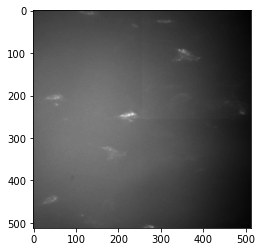

In [2]:

nx,ny=64,64#146

X=np.load('spatial_X.npy').reshape((nx*ny,512*512))#[:nx,60:60+ny,:]

#X = np.reshape(features, (nx*ny,16384))

connectivity = grid_to_graph(n_x=512, n_y=512)

agglo_spatial = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=4096)#,linkage='complete')

agglo_spatial.fit(X)
FA_spatial=np.load('spatial_features.npy')
RS_spatial = agglo_spatial.inverse_transform(FA_spatial)
RS_spatial=RS_spatial.reshape((nx,ny,512,512))

plt.imshow(X[0].reshape((512,512)),cmap='gray')

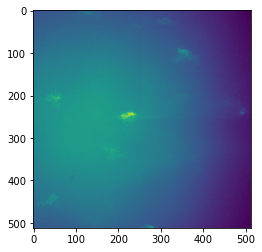

In [3]:
plt.imshow(RS_spatial[0,0])


0.9988583255189302


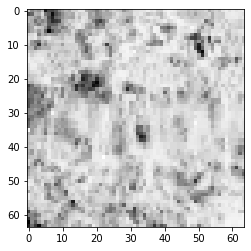

In [4]:
#print(RS_features[i,j],features[i,j])
X_spatial=np.reshape(X,(nx,ny,512,512))
Cs_spatial=np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        Cs_spatial[i,j]=ZNSS(RS_spatial[i,j],X_spatial[i,j])
plt.imshow(Cs_spatial,cmap='gray')

print(Cs_spatial.max())

In [5]:
X=np.load('frequency_X.npy').reshape((nx*ny,512*512))#[:nx,60:60+ny,:]

connectivity = grid_to_graph(n_x=512, n_y=512)

agglo_frequency = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=4096)#,linkage='complete')

agglo_frequency.fit(X)
FA_frequency=np.load('frequency_features.npy')

RS_frequency = agglo_frequency.inverse_transform(FA_frequency)
RS_frequency=RS_frequency.reshape((nx,ny,512,512))

0.9987653381998601


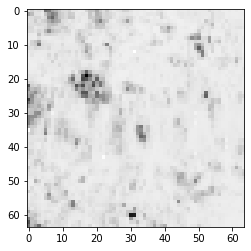

In [6]:
X_frequency=np.reshape(X,(nx,ny,512,512))
Cs_frequency=np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        Cs_frequency[i,j]=ZNSS(fft.idstn(RS_frequency[i,j]),X_spatial[i,j])
plt.imshow(Cs_frequency,cmap='gray')

print(Cs_frequency.max())

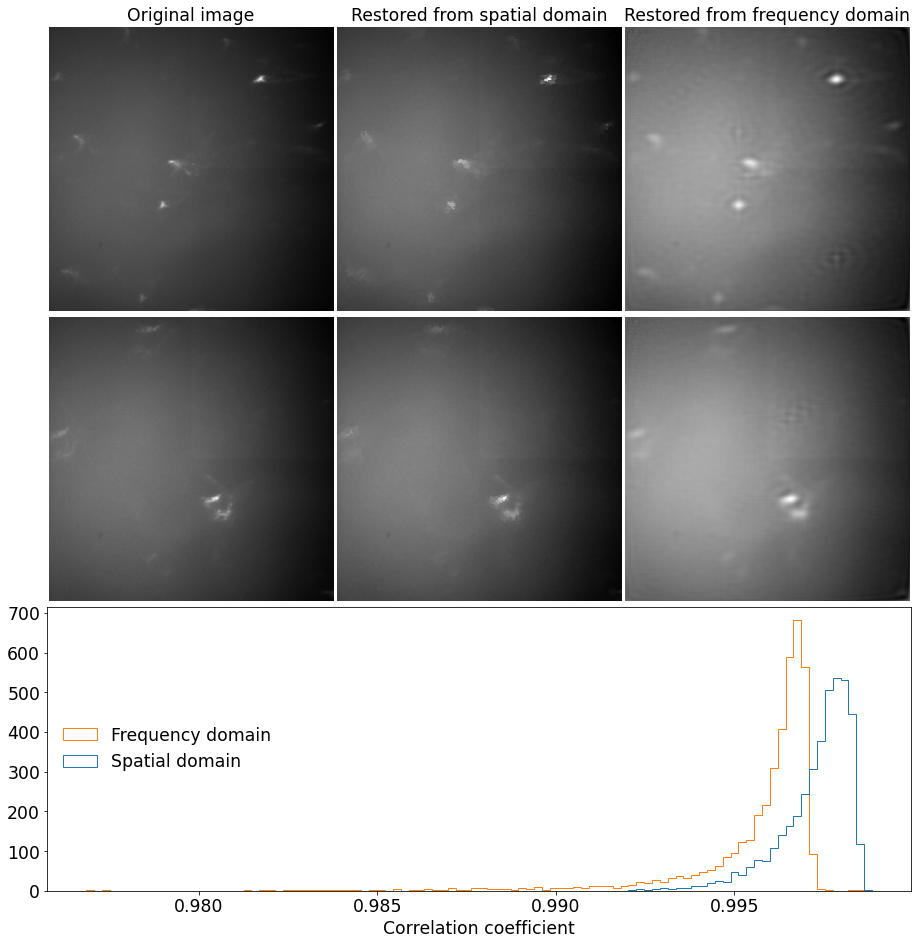

In [7]:


#spatial_features=np.load("spatial_features.npy")
#frequency_features=np.load("frequency_features.npy")

connectivity = grid_to_graph(n_x=512, n_y=512)



fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=3, ncols=3, left=0, right=1.,bottom=0,top=1., wspace=0.002,hspace=0.02)
i,j=2,3


ax1 = fig.add_subplot(gs[0,0])

ax1.axis('off')

im=ax1.imshow(X_spatial[i,j],cmap='gray')
ax1.set_title("Original image",size='xx-large')
########################################################################################

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=4096)#,linkage='complete')



ax2 = fig.add_subplot(gs[0,1])

ax2.axis('off')
im=ax2.imshow(RS_spatial[i,j],cmap='gray')
#ax1.text(0,0,"a",size='xx-large',verticalalignment='top',color='white')
#cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
ax2.set_title("Restored from spatial domain",size='xx-large')
########################################################################################
ax3 = fig.add_subplot(gs[0,2])

ax3.axis('off')
im=ax3.imshow(fft.idstn(RS_frequency[i,j]),cmap='gray')
#ax1.text(0,0,"a",size='xx-large',verticalalignment='top',color='white')
#cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
ax3.set_title("Restored from frequency domain",size='xx-large')

########################################################################################

i,j=25,26

ax4 = fig.add_subplot(gs[1,0])

ax4.axis('off')
im=ax4.imshow(X_spatial[i,j],cmap='gray')
#ax1.text(0,0,"a",size='xx-large',verticalalignment='top',color='white')
#cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
########################################################################################
ax5 = fig.add_subplot(gs[1,1])

ax5.axis('off')
im=ax5.imshow(RS_spatial[i,j],cmap='gray')
#ax1.text(0,0,"a",size='xx-large',verticalalignment='top',color='white')
#cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
########################################################################################
ax6 = fig.add_subplot(gs[1,2])

ax6.axis('off')
im=ax6.imshow(fft.idstn(RS_frequency[i,j]),cmap='gray')
#ax1.text(0,0,"a",size='xx-large',verticalalignment='top',color='white')
#cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
########################################################################################


ax7= fig.add_subplot(gs[2,:])
Cs_spatial_,Cs_frequency_=Cs_spatial.ravel(),Cs_frequency.ravel()
Cs_spatial_,Cs_frequency_=np.delete(Cs_spatial_,np.argmin(Cs_spatial_)),np.delete(Cs_frequency,np.argmin(Cs_frequency))
ax7.set_xlabel("Correlation coefficient",size='xx-large')

ax7.hist([Cs_spatial_,Cs_frequency_],label=['Spatial domain','Frequency domain'],histtype = 'step',bins=100)
leg = ax7.legend(frameon=False,loc='center left',fontsize='xx-large')
ax7.tick_params(axis='x', labelsize= "xx-large")
ax7.tick_params(axis='y', labelsize= "xx-large")


plt.savefig('fig3.tif',format='tif',bbox_inches ='tight')

In [8]:
arg=np.abs(X_spatial[:,:,0,0]).argmin()
print(arg)
print(X_spatial[arg//64,arg%64])

561
[[-0.078285979877163 -0.167994880590255 -0.189727457201059 ...
  -2.23080341944318  -2.253329880131091 -2.267818264538294]
 [-0.037599420925429 -0.120262600454196 -0.20620055180103  ...
  -2.267322086990102 -2.263253431094929 -2.255413825833497]
 [-0.057744229382019 -0.178116902573369 -0.166605583455318 ...
  -2.250551285861217 -2.249161988726279 -2.278039522031047]
 ...
 [-0.254726716014196 -0.285787430531007 -0.331931942512852 ...
  -2.119361942119284 -2.165208747572213 -2.150025714597541]
 [-0.351382102401974 -0.320817565433354 -0.302657467169531 ...
  -2.157766084349335 -2.173842236910752 -2.1990480563589  ]
 [-0.262566321275627 -0.34552720733331  -0.260879317611775 ...
  -2.190513802529999 -2.175430005064966 -2.195872520050472]]
